### Imports

In [80]:
# import necessary python libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats import pearsonr
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Load Data

In [81]:
# Monthly volume lag time series data
df = pd.read_csv('P.Oakley Existing Customer Volume.csv', parse_dates=['Month'])
df = df.set_index('Month')
df

,1M Lag Volume,2M Lag Volume,3M Lag Volume,4M Lag Volume,5M Lag Volume,6M Lag Volume
Month,,,,,,
2016-06-01,0,0,0,0,0,0
2016-07-01,107000,0,0,0,0,0
2016-08-01,98000,68000,0,0,0,0
2016-09-01,37000,37000,21000,0,0,0
2016-10-01,61000,55000,54000,33000,0,0
...,...,...,...,...,...,...
2022-12-01,420454000,420165000,419482000,419153000,419139000,418871000
2023-01-01,498092000,464292000,463993000,463322000,463243000,463233000
2023-02-01,364078000,364062000,363457000,363103000,362466000,362428000


In [82]:
# Existing marketing spend data
esm = pd.read_csv('Existing S&M Spend.csv', parse_dates=['Date'])
#esm['Date'] = esm['Date'].shift(-1)
#esm = esm.dropna()
esm = esm.set_index('Date')
esm

,Sales Team Farmer Expense,Account Management
Date,,
2021-01-01,36.26,28.33
2021-02-01,40.65,28.33
2021-03-01,73.41,28.33
2021-04-01,23.81,28.71
2021-05-01,15.74,36.25
2021-06-01,21.22,28.33
2021-07-01,15.78,28.33
2021-08-01,16.55,40.00
2021-09-01,16.11,41.60


In [83]:
# Monthly correlation metrics
dm = pd.read_csv('Monthly Correlation Metrics.csv', parse_dates=['Month'])
dm['Month'] = dm['Month'].shift(-1)
dm = dm.dropna()
dm = dm.set_index('Month')
dm

,EOMONTH,Fed_Funds_Target_Rate,LIBOR___3_Month,United_States_Treasury_Constant_Maturity___1_Year,United_States_Treasury_Constant_Maturity___5_Year,United_States_Treasury_Constant_Maturity___10_Year,United_States_Treasury_Constant_Maturity___30_Year,US_Prime_Rate
Month,,,,,,,,
2016-07-01,6/30/2016,0.0050,0.006541,0.0045,0.0101,0.0149,0.0230,0.0350
2016-08-01,7/31/2016,0.0050,0.007591,0.0050,0.0103,0.0146,0.0218,0.0350
2016-09-01,8/31/2016,0.0050,0.008393,0.0061,0.0119,0.0158,0.0223,0.0350
2016-10-01,9/30/2016,0.0050,0.008537,0.0059,0.0114,0.0160,0.0232,0.0350
2016-11-01,10/31/2016,0.0050,0.008843,0.0066,0.0131,0.0184,0.0258,0.0350
...,...,...,...,...,...,...,...,...
2022-12-01,11/30/2022,0.0400,0.047786,0.0474,0.0382,0.0368,0.0380,0.0700
2023-01-01,12/31/2022,0.0450,0.047673,0.0473,0.0399,0.0388,0.0397,0.0750
2023-02-01,1/31/2023,0.0450,0.048136,0.0468,0.0363,0.0352,0.0365,0.0750


In [84]:
# Join volume and marketing spend data
data1 = pd.merge(df, esm, left_index=True, right_index=True, how='inner')
data1['Sales Team Farmer Expense'] = data1['Sales Team Farmer Expense']*1000
data1['Account Management'] = data1['Account Management']*1000

In [85]:
# Joiin merged data frame with correlation metric data
cdata = pd.merge(data1, dm, left_index=True, right_index=True, how='inner').drop(columns=['EOMONTH'])

### Preview Data

In [86]:
#cdata.drop(index=cdata.index[-1],axis=0,inplace=True)

In [87]:
cdata

,1M Lag Volume,2M Lag Volume,3M Lag Volume,4M Lag Volume,5M Lag Volume,6M Lag Volume,Sales Team Farmer Expense,Account Management,Fed_Funds_Target_Rate,LIBOR___3_Month,United_States_Treasury_Constant_Maturity___1_Year,United_States_Treasury_Constant_Maturity___5_Year,United_States_Treasury_Constant_Maturity___10_Year,United_States_Treasury_Constant_Maturity___30_Year,US_Prime_Rate
2021-01-01,482539000,482533000,482533000,481996000,479035000,479032000,36260.0,28330.0,0.0025,0.002384,0.0010,0.0036,0.0093,0.0165,0.0325
2021-02-01,435043000,434894000,434881000,434881000,434680000,433006000,40650.0,28330.0,0.0025,0.002019,0.0010,0.0045,0.0111,0.0187,0.0325
2021-03-01,394415000,393084000,392976000,392953000,392953000,392500000,73410.0,28330.0,0.0025,0.001884,0.0008,0.0075,0.0144,0.0217,0.0325
2021-04-01,437883000,437757000,437594000,437437000,437422000,437422000,23810.0,28710.0,0.0025,0.001942,0.0007,0.0092,0.0174,0.0241,0.0325
2021-05-01,444177000,443989000,440914000,440725000,440391000,440374000,15740.0,36250.0,0.0025,0.001764,0.0005,0.0086,0.0165,0.0230,0.0325
2021-06-01,308709000,308692000,308591000,304642000,304459000,303962000,21220.0,28330.0,0.0025,0.001314,0.0005,0.0079,0.0158,0.0226,0.0325
2021-07-01,313384000,313099000,313086000,313023000,309455000,309348000,15780.0,28330.0,0.0025,0.001458,0.0007,0.0087,0.0145,0.0206,0.0325
2021-08-01,366614000,366335000,365865000,365856000,365715000,362468000,16550.0,40000.0,0.0025,0.001177,0.0007,0.0069,0.0124,0.0189,0.0325
2021-09-01,383026000,381948000,381487000,380867000,380828000,380563000,16110.0,41600.0,0.0025,0.001196,0.0007,0.0077,0.0130,0.0192,0.0325
2021-10-01,477088000,477035000,473375000,472892000,472169000,472126000,27820.0,68900.0,0.0025,0.001301,0.0009,0.0098,0.0152,0.0208,0.0325


In [88]:
#cdata.to_csv('Existing Customer Volume Analysis Data v1.csv')

In [89]:
#cdata = cdata.pct_change() * 100
#cdata.dropna(inplace=True)
#cdata
# to convert to pct change

### Initial linear regressions and correlations

##### Linear regression of Account Management on existing customer (lagged) volume

In [90]:
results_df = pd.DataFrame()
input_df = cdata
for i in range(len(input_df.columns)-9):
    yVar = input_df[['1M Lag Volume', '2M Lag Volume', '3M Lag Volume', '4M Lag Volume', '5M Lag Volume', '6M Lag Volume']].iloc[:,i]
    xVar = input_df['Account Management']
    data = pd.merge(yVar, xVar, left_index=True, right_index=True, how="inner")
    X = data['Account Management']
    y = data.iloc[:,0]
    X = sm.add_constant(X)
    model=sm.OLS(y,X)
    results = model.fit()
    results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared, 'P-value': results.pvalues[1]}, ignore_index=True)
    # Calculate correlation between residual component and Fed Funds Target Rate
    correlation, p_value = pearsonr(data.iloc[:,0], data['Account Management'])
    print(f"Correlation between volume and account management spend: {correlation:.6f}")
    print(f"P-value: {p_value:.6f}")

Correlation between volume and account management spend: 0.064403
P-value: 0.744736
Correlation between volume and account management spend: 0.049118
P-value: 0.803973
Correlation between volume and account management spend: 0.050444
P-value: 0.798786
Correlation between volume and account management spend: 0.052963
P-value: 0.788959
Correlation between volume and account management spend: 0.054819
P-value: 0.781737
Correlation between volume and account management spend: 0.056304
P-value: 0.775970


C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\2674870682.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared, 'P-value': results.pvalues[1]}, ignore_index=True)
C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\2674870682.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared, 'P-value': results.pvalues[1]}, ignore_index=True)
C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\2674870682.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared

In [91]:
output = results_df.sort_values(['R-squared', 'P-value'], ascending=False).reset_index().drop(columns='index')

In [92]:
output

,Variable,R-squared,P-value
0,1M Lag Volume,0.004148,0.744736
1,6M Lag Volume,0.003170,0.775970
2,5M Lag Volume,0.003005,0.781737
3,4M Lag Volume,0.002805,0.788959
4,3M Lag Volume,0.002545,0.798786
5,2M Lag Volume,0.002413,0.803973


##### Linear regression of US_Prime_Rate on existing customer (lagged) volume

In [93]:
results_df = pd.DataFrame()
input_df = cdata
for i in range(len(input_df.columns)-9):
    yVar = input_df[['1M Lag Volume', '2M Lag Volume', '3M Lag Volume', '4M Lag Volume', '5M Lag Volume', '6M Lag Volume']].iloc[:,i]
    xVar = input_df['US_Prime_Rate']
    data = pd.merge(yVar, xVar, left_index=True, right_index=True, how="inner")
    X = data['US_Prime_Rate']
    y = data.iloc[:,0]
    X = sm.add_constant(X)
    model=sm.OLS(y,X)
    results = model.fit()
    results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared, 'P-value': results.pvalues[1]}, ignore_index=True)
    correlation, p_value = pearsonr(data.iloc[:,0], data['US_Prime_Rate'])
    print(f"Correlation between volume and the US prime rate: {correlation:.6f}")
    print(f"P-value: {p_value:.6f}")

Correlation between volume and the US prime rate: -0.232865
P-value: 0.233062
Correlation between volume and the US prime rate: -0.259731
P-value: 0.181958
Correlation between volume and the US prime rate: -0.257807
P-value: 0.185334
Correlation between volume and the US prime rate: -0.255811
P-value: 0.188881
Correlation between volume and the US prime rate: -0.252911
P-value: 0.194117
Correlation between volume and the US prime rate: -0.249730
P-value: 0.199975


C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\2211516335.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared, 'P-value': results.pvalues[1]}, ignore_index=True)
C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\2211516335.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared, 'P-value': results.pvalues[1]}, ignore_index=True)
C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\2211516335.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared

In [94]:
output = results_df.sort_values(['R-squared', 'P-value'], ascending=False).reset_index().drop(columns='index')

In [95]:
output

,Variable,R-squared,P-value
0,2M Lag Volume,0.067460,0.181958
1,3M Lag Volume,0.066464,0.185334
2,4M Lag Volume,0.065439,0.188881
3,5M Lag Volume,0.063964,0.194117
4,6M Lag Volume,0.062365,0.199975
5,1M Lag Volume,0.054226,0.233062


##### Linear regression of account management and US Prime Rate on Existing customer volume lags

In [96]:
results_df = pd.DataFrame()
input_df = cdata
for i in range(len(input_df.columns)-9):
    yVar = input_df[['1M Lag Volume', '2M Lag Volume', '3M Lag Volume', '4M Lag Volume', '5M Lag Volume', '6M Lag Volume']].iloc[:,i]
    xVar = input_df[['US_Prime_Rate', 'Account Management']]
    data = pd.merge(yVar, xVar, left_index=True, right_index=True, how="inner")
    X = data[['US_Prime_Rate', 'Account Management']]
    y = data.iloc[:,0]
    X = sm.add_constant(X)
    model=sm.OLS(y,X)
    results = model.fit()
    results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared, 'US P-Rate P-value': results.pvalues[1], 'Acc Mgmt P-value': results.pvalues[2]}, ignore_index=True)
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          1M Lag Volume   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     3.409
Date:                Mon, 26 Jun 2023   Prob (F-statistic):             0.0491
Time:                        10:58:32   Log-Likelihood:                -547.39
No. Observations:                  28   AIC:                             1101.
Df Residuals:                      25   BIC:                             1105.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.959e+08   4.28

C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\1187795098.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared, 'US P-Rate P-value': results.pvalues[1], 'Acc Mgmt P-value': results.pvalues[2]}, ignore_index=True)
C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\1187795098.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': data.columns[0], 'R-squared': results.rsquared, 'US P-Rate P-value': results.pvalues[1], 'Acc Mgmt P-value': results.pvalues[2]}, ignore_index=True)
C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\1187795098.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [97]:
output = results_df.sort_values(['R-squared', 'US P-Rate P-value', 'Acc Mgmt P-value'], ascending=False).reset_index().drop(columns='index')

In [98]:
output

,Variable,R-squared,US P-Rate P-value,Acc Mgmt P-value
0,2M Lag Volume,0.235149,0.010709,0.027497
1,4M Lag Volume,0.234141,0.010965,0.027168
2,3M Lag Volume,0.233907,0.010972,0.027715
3,5M Lag Volume,0.232105,0.011406,0.027587
4,6M Lag Volume,0.229163,0.012053,0.028431
5,1M Lag Volume,0.214285,0.015934,0.033017


In [99]:
X = cdata[['US_Prime_Rate', 'Account Management']]
y = cdata['6M Lag Volume']
X = sm.add_constant(X)
model=sm.OLS(y,X)
results = model.fit()
predictions = results.predict(X)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          6M Lag Volume   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3.716
Date:                Mon, 26 Jun 2023   Prob (F-statistic):             0.0386
Time:                        10:58:33   Log-Likelihood:                -546.75
No. Observations:                  28   AIC:                             1099.
Df Residuals:                      25   BIC:                             1103.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.951e+08   4.18

In [100]:
df = pd.DataFrame({'Existing Volume 6M Lag':y, 'Regression Predicted Existing Volume':predictions})
#df.to_csv('6M Lag existing Volume Predictions.csv')

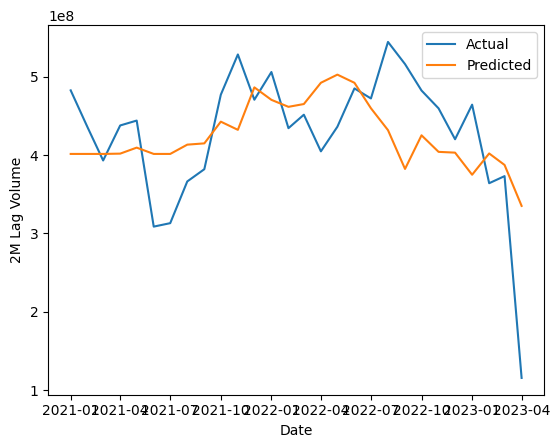

In [101]:
plt.plot(cdata.index, cdata['2M Lag Volume'], label='Actual')
plt.plot(cdata.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('2M Lag Volume')
plt.legend()
plt.show()

### Seasonal decompoisition of volume lags

#### 1 Month Lag

In [102]:
# Perform Holt-Winters decomposition
result = seasonal_decompose(cdata['1M Lag Volume'], model='additive', extrapolate_trend='freq')

In [103]:
# Extract trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [104]:
sresid = residual + seasonal
sresid.name = 'sresid'


In [105]:
df = pd.DataFrame({'Existing Volume 6M Lag':y, 'Existing Volume Trend Component': trend, 'Existing Volume Seasonal Component': seasonal, 'Existing Volume Residual Component': residual})
#df.to_csv('6M Lag Existing Volume Decomp Data.csv')

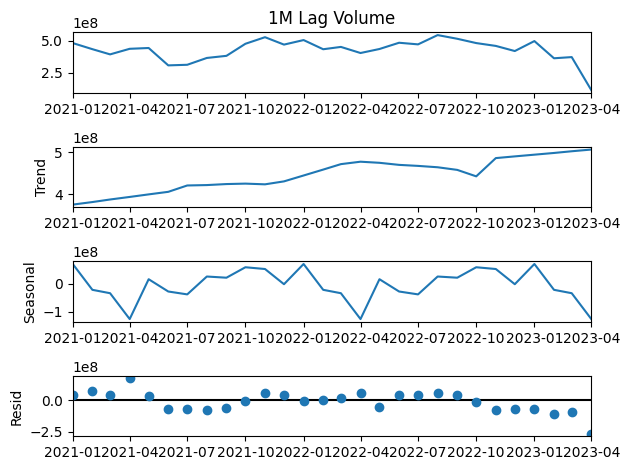

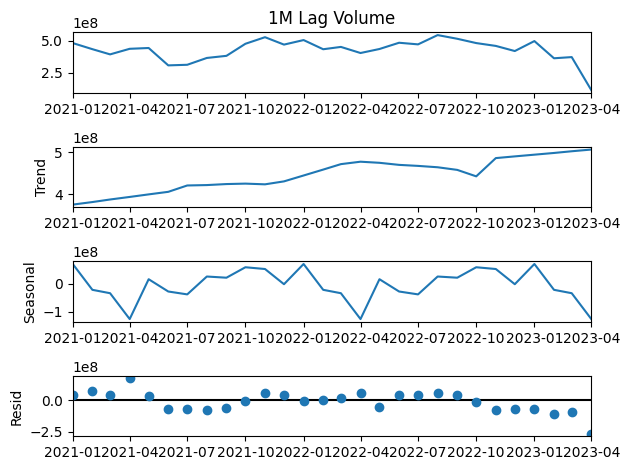

In [106]:
result.plot()

In [107]:
residualdf = pd.merge(sresid.dropna(), cdata['US_Prime_Rate'], left_index=True, right_index=True, how='inner')
residualdf

,sresid,US_Prime_Rate
2021-01-01,1.068986e+08,0.0325
2021-02-01,5.332530e+07,0.0325
2021-03-01,6.619950e+06,0.0325
2021-04-01,4.401060e+07,0.0325
2021-05-01,4.422725e+07,0.0325
2021-06-01,-9.731810e+07,0.0325
2021-07-01,-1.077479e+08,0.0325
2021-08-01,-5.546975e+07,0.0325
2021-09-01,-4.145712e+07,0.0325
2021-10-01,5.154696e+07,0.0325


In [108]:
trenddf = pd.merge(trend.dropna(), cdata['Account Management'], left_index=True, right_index=True, how='inner')
trenddf

,trend,Account Management
2021-01-01,3.756404e+08,28330.0
2021-02-01,3.817177e+08,28330.0
2021-03-01,3.877950e+08,28330.0
2021-04-01,3.938724e+08,28710.0
2021-05-01,3.999497e+08,36250.0
2021-06-01,4.060271e+08,28330.0
2021-07-01,4.211319e+08,28330.0
2021-08-01,4.220838e+08,40000.0
2021-09-01,4.244831e+08,41600.0
2021-10-01,4.255410e+08,68900.0


##### Correlation of US Prime Rate on residual component of 1 Month Lagged Volume and Account Managment Spend on trend component of 1 Month Lagged Volume

In [109]:
# Calculate correlation between residual component and Fed Funds Target Rate
correlation, p_value = pearsonr(residualdf['sresid'], residualdf['US_Prime_Rate'])
print(f"Correlation between residual component and the US prime rate: {correlation:.6f}")
print(f"P-value: {p_value:.6f}")

Correlation between residual component and the US prime rate: -0.494899
P-value: 0.007419


In [110]:
# Calculate correlation between residual component and Fed Funds Target Rate
correlation, p_value = pearsonr(trenddf['trend'], trenddf['Account Management'])
print(f"Correlation between trend component and account management spend: {correlation:.6f}")
print(f"P-value: {p_value:.6f}")

Correlation between trend component and account management spend: 0.897952
P-value: 0.000000


##### Linear regression of trends and residual on account management and US Prime Rate

In [111]:
X = residualdf['US_Prime_Rate']
y = residualdf['sresid']
X = sm.add_constant(X)
model=sm.OLS(y,X)
results = model.fit()
predictions = results.predict(X)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 sresid   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     8.434
Date:                Mon, 26 Jun 2023   Prob (F-statistic):            0.00742
Time:                        10:58:35   Log-Likelihood:                -550.90
No. Observations:                  28   AIC:                             1106.
Df Residuals:                      26   BIC:                             1108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            1.1e+08    4.7e+07      2.341

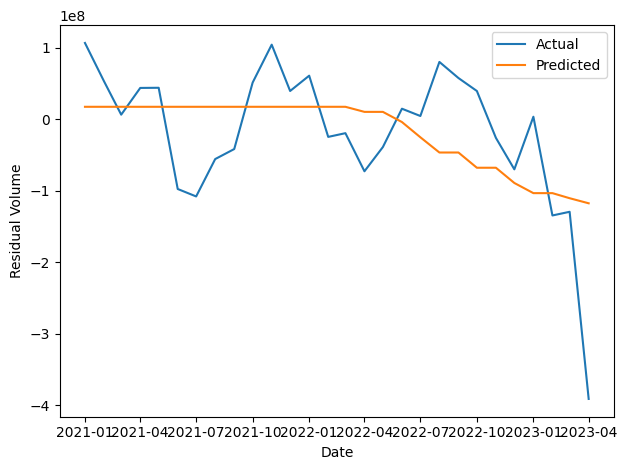

In [112]:
plt.plot(residualdf.index, residualdf['sresid'], label='Actual')
plt.plot(residualdf.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Residual Volume')
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
X = trenddf['Account Management']
y = trenddf['trend']
X = sm.add_constant(X)
model=sm.OLS(y,X)
results = model.fit()
predictions = results.predict(X)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  trend   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     108.2
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           9.24e-11
Time:                        10:58:36   Log-Likelihood:                -505.78
No. Observations:                  28   AIC:                             1016.
Df Residuals:                      26   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.844e+08   6.84

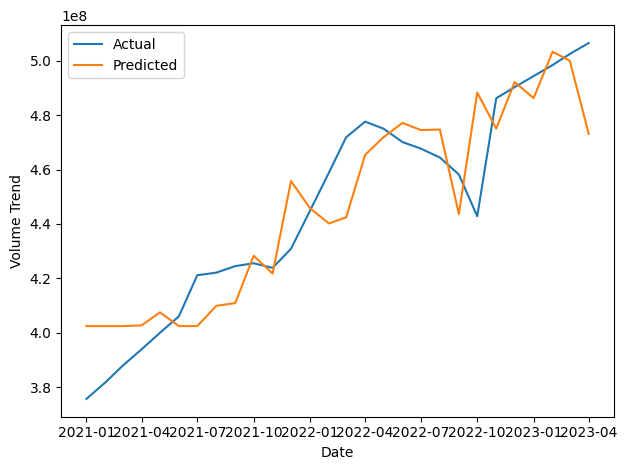

In [114]:
plt.plot(trenddf.index, trenddf['trend'], label='Actual')
plt.plot(trenddf.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Volume Trend')
plt.legend()
plt.tight_layout()
plt.show()

#### 2 Month Lag

In [115]:
# Perform Holt-Winters decomposition
result = seasonal_decompose(cdata['2M Lag Volume'], model='additive', extrapolate_trend='freq')

In [116]:
# Extract trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

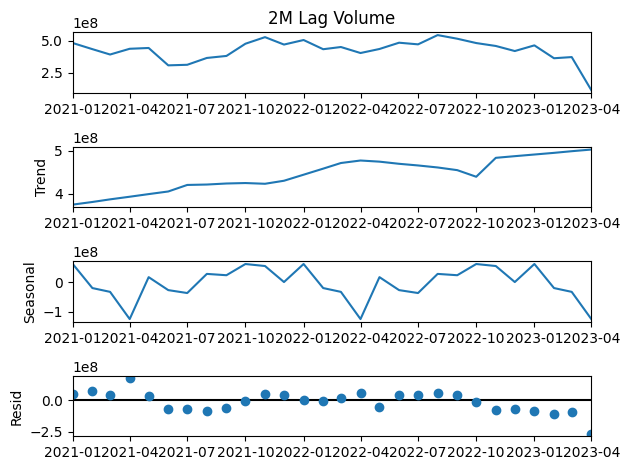

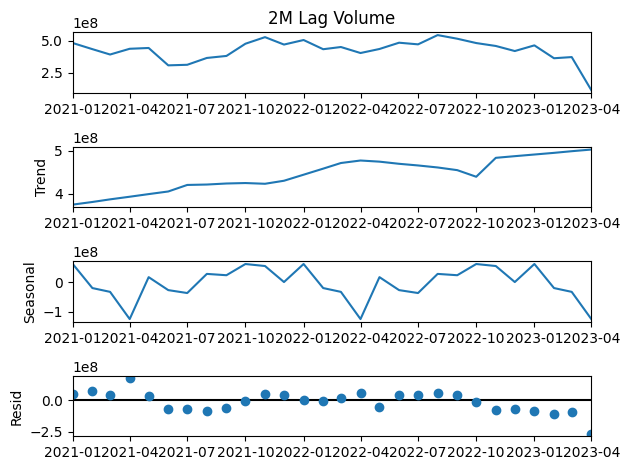

In [117]:
result.plot()

In [118]:
residualdf = pd.merge(residual.dropna(), cdata['US_Prime_Rate'], left_index=True, right_index=True, how='inner')
residualdf

,resid,US_Prime_Rate
2021-01-01,4.635003e+07,0.0325
2021-02-01,7.379402e+07,0.0325
2021-03-01,3.873210e+07,0.0325
2021-04-01,1.690915e+08,0.0325
2021-05-01,2.783312e+07,0.0325
2021-06-01,-6.978878e+07,0.0325
2021-07-01,-7.064262e+07,0.0325
2021-08-01,-8.290568e+07,0.0325
2021-09-01,-6.524885e+07,0.0325
2021-10-01,-9.024976e+06,0.0325


In [119]:
trenddf = pd.merge(trend.dropna(), cdata['Account Management'], left_index=True, right_index=True, how='inner')
trenddf

,trend,Account Management
2021-01-01,3.753272e+08,28330.0
2021-02-01,3.814066e+08,28330.0
2021-03-01,3.874859e+08,28330.0
2021-04-01,3.935653e+08,28710.0
2021-05-01,3.996447e+08,36250.0
2021-06-01,4.057241e+08,28330.0
2021-07-01,4.208342e+08,28330.0
2021-08-01,4.217850e+08,40000.0
2021-09-01,4.241935e+08,41600.0
2021-10-01,4.252510e+08,68900.0


##### Correlation of US Prime Rate on residual component of 2 Month Lagged Volume and Account Managment Spend on trend component of 2 Month Lagged Volume

In [120]:
# Calculate correlation between residual component and Fed Funds Target Rate
correlation, p_value = pearsonr(residualdf['resid'], residualdf['US_Prime_Rate'])
print(f"Correlation between residual component and the US prime rate: {correlation:.6f}")
print(f"P-value: {p_value:.6f}")

Correlation between residual component and the US prime rate: -0.592446
P-value: 0.000895


In [121]:
# Calculate correlation between residual component and Fed Funds Target Rate
correlation, p_value = pearsonr(trenddf['trend'], trenddf['Account Management'])
print(f"Correlation between trend component and account management spend: {correlation:.6f}")
print(f"P-value: {p_value:.6f}")

Correlation between trend component and account management spend: 0.893173
P-value: 0.000000


##### Linear regression of trends and residual on account management and US Prime Rate

In [122]:
X = residualdf['US_Prime_Rate']
y = residualdf['resid']
X = sm.add_constant(X)
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     14.06
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           0.000895
Time:                        10:58:37   Log-Likelihood:                -543.35
No. Observations:                  28   AIC:                             1091.
Df Residuals:                      26   BIC:                             1093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.122e+08   3.59e+07      3.126

In [123]:
X = trenddf['Account Management']
y = trenddf['trend']
X = sm.add_constant(X)
model=sm.OLS(y,X)
results = model.fit()
results_df = results_df.append({'Variable': 'Trend Volume', 'R-squared': results.rsquared, 'Account Management': results.pvalues[1]}, ignore_index=True)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  trend   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     102.6
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.63e-10
Time:                        10:58:37   Log-Likelihood:                -505.73
No. Observations:                  28   AIC:                             1015.
Df Residuals:                      26   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.849e+08   6.82

C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\1310647278.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': 'Trend Volume', 'R-squared': results.rsquared, 'Account Management': results.pvalues[1]}, ignore_index=True)


#### 6 Month Lag

In [124]:
# Perform Holt-Winters decomposition
result = seasonal_decompose(cdata['6M Lag Volume'], model='additive', extrapolate_trend='freq')

In [125]:
# Extract trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

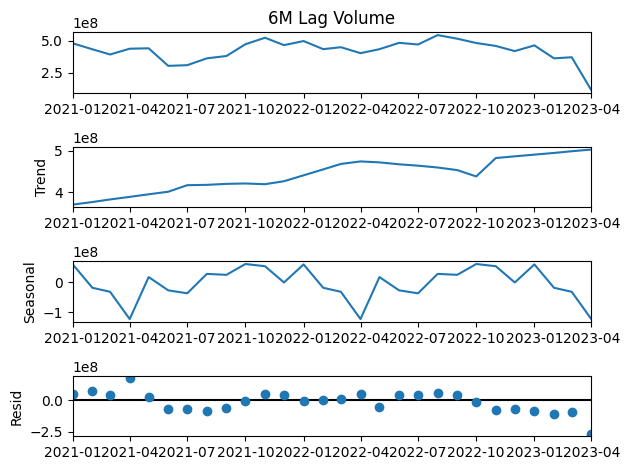

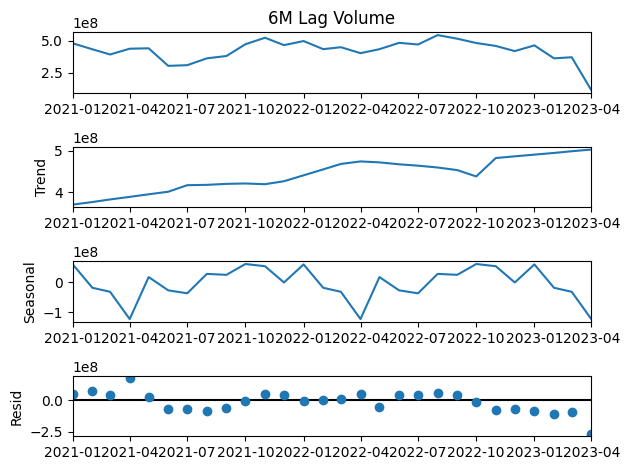

In [126]:
result.plot()

In [127]:
residualdf = pd.merge(residual.dropna(), cdata['US_Prime_Rate'], left_index=True, right_index=True, how='inner')
residualdf

,resid,US_Prime_Rate
2021-01-01,4.928198e+07,0.0325
2021-02-01,7.512397e+07,0.0325
2021-03-01,4.190880e+07,0.0325
2021-04-01,1.717868e+08,0.0325
2021-05-01,2.816788e+07,0.0325
2021-06-01,-7.002958e+07,0.0325
2021-07-01,-7.046289e+07,0.0325
2021-08-01,-8.305695e+07,0.0325
2021-09-01,-6.424587e+07,0.0325
2021-10-01,-9.775703e+06,0.0325


In [128]:
trenddf = pd.merge(trend.dropna(), cdata['Account Management'], left_index=True, right_index=True, how='inner')
trenddf

,trend,Account Management
2021-01-01,3.706236e+08,28330.0
2021-02-01,3.768184e+08,28330.0
2021-03-01,3.830133e+08,28330.0
2021-04-01,3.892081e+08,28710.0
2021-05-01,3.954029e+08,36250.0
2021-06-01,4.015977e+08,28330.0
2021-07-01,4.172936e+08,28330.0
2021-08-01,4.180851e+08,40000.0
2021-09-01,4.204817e+08,41600.0
2021-10-01,4.213872e+08,68900.0


##### Correlation of US Prime Rate on residual component of 6 Month Lagged Volume and Account Managment Spend on trend component of 6 Month Lagged Volume

In [129]:
# Calculate correlation between residual component and Fed Funds Target Rate
correlation, p_value = pearsonr(residualdf['resid'], residualdf['US_Prime_Rate'])
print(f"Correlation between residual component and the US prime rate: {correlation:.6f}")
print(f"P-value: {p_value:.6f}")

Correlation between residual component and the US prime rate: -0.593312
P-value: 0.000875


In [130]:
# Calculate correlation between residual component and Fed Funds Target Rate
correlation, p_value = pearsonr(trenddf['trend'], trenddf['Account Management'])
print(f"Correlation between trend component and account management spend: {correlation:.6f}")
print(f"P-value: {p_value:.6f}")

Correlation between trend component and account management spend: 0.896905
P-value: 0.000000


##### Linear regression of trends and residual on account management and US Prime Rate

In [131]:
X = residualdf['US_Prime_Rate']
y = residualdf['resid']
X = sm.add_constant(X)
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     14.12
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           0.000875
Time:                        10:58:39   Log-Likelihood:                -543.57
No. Observations:                  28   AIC:                             1091.
Df Residuals:                      26   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.136e+08   3.62e+07      3.141

In [132]:
X = trenddf['Account Management']
y = trenddf['trend']
X = sm.add_constant(X)
model=sm.OLS(y,X)
results = model.fit()
results_df = results_df.append({'Variable': 'Trend Volume', 'R-squared': results.rsquared, 'Account Management': results.pvalues[1]}, ignore_index=True)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  trend   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.05e-10
Time:                        10:58:39   Log-Likelihood:                -506.23
No. Observations:                  28   AIC:                             1016.
Df Residuals:                      26   BIC:                             1019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.798e+08   6.95

C:\Users\cmasterson\AppData\Local\Temp\ipykernel_36252\1310647278.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': 'Trend Volume', 'R-squared': results.rsquared, 'Account Management': results.pvalues[1]}, ignore_index=True)
